## Load Modules

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array,save_img,ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Activation,Flatten,GlobalAveragePooling2D,Dropout,BatchNormalization,Conv2D,MaxPooling2D

## Tensorflow Version & GPU checking

In [2]:
tf.__version__

'2.9.0'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8302490687659183220
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1738696295
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17489114588602028199
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## Load Dataset

In [4]:
Train_Dir = '../../Datasets/Alzheimer/train/'
Val_Dir = '../../Datasets/Alzheimer/val/'

In [5]:
gen = ImageDataGenerator(rescale=1./255.0)

In [6]:
Train_Data = gen.flow_from_directory(Train_Dir,target_size=(128,128),shuffle=True)
Test_Data = gen.flow_from_directory(Val_Dir,target_size=(128,128),shuffle=True)

Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [7]:
Train_Data.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

## Model

In [8]:
def features_layer():
    feature_extraction = [
        Conv2D(128,(3,3),input_shape=(128,128,3),activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D((2,2))
    ]
    return feature_extraction

In [9]:
def classification_layer():
    Classification_Layer = [
    Flatten(),
    Dense(units=512,activation='relu'),
    BatchNormalization(),
    Dense(units=256,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=128,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=4,activation='softmax')
    ]
    return Classification_Layer

In [10]:
model = []
for layer in features_layer():
    model.append(layer)

In [11]:
for cls_layer in classification_layer():
    model.append(cls_layer)

In [12]:
final_model = Sequential(model)

In [13]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [14]:
plot_model(final_model,to_file='../../Model_Code/Alzheimer/Alzheimer.png',show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Compile

In [15]:
callback = EarlyStopping(monitor='loss',patience=3)

In [16]:
checkpoint = ModelCheckpoint(filepath='../../Models/Alzheimer/Alzheimer_CNN.hdf5',monitor='val_loss',save_best_only=True,verbose=0,mode='auto')

In [17]:
final_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

## Training

In [18]:
history = final_model.fit(Train_Data,validation_data=Test_Data,epochs=100,callbacks=[callback,checkpoint])

Epoch 1/100
1062/1062 [==============================] - 65s 56ms/step - loss: 1.0238 - acc: 0.5454 - val_loss: 1.0664 - val_acc: 0.4723
Epoch 2/100
1062/1062 [==============================] - 81s 76ms/step - loss: 0.6749 - acc: 0.7085 - val_loss: 0.8950 - val_acc: 0.6677
Epoch 3/100
1062/1062 [==============================] - 97s 91ms/step - loss: 0.5334 - acc: 0.7755 - val_loss: 0.6748 - val_acc: 0.7408
Epoch 4/100
1062/1062 [==============================] - 106s 100ms/step - loss: 0.4380 - acc: 0.8199 - val_loss: 0.4360 - val_acc: 0.8055
Epoch 5/100
1062/1062 [==============================] - 98s 92ms/step - loss: 0.3757 - acc: 0.8512 - val_loss: 0.8741 - val_acc: 0.6852
Epoch 6/100
1062/1062 [==============================] - 98s 92ms/step - loss: 0.3286 - acc: 0.8698 - val_loss: 0.2234 - val_acc: 0.9102
Epoch 7/100
1062/1062 [==============================] - 104s 97ms/step - loss: 0.2906 - acc: 0.8852 - val_loss: 0.2870 - val_acc: 0.8994
Epoch 8/100
1062/1062 [===============

## Save Model

In [19]:
final_model.save('../../Models/Alzheimer/Alzheimer_CNN.h5')

## Graph

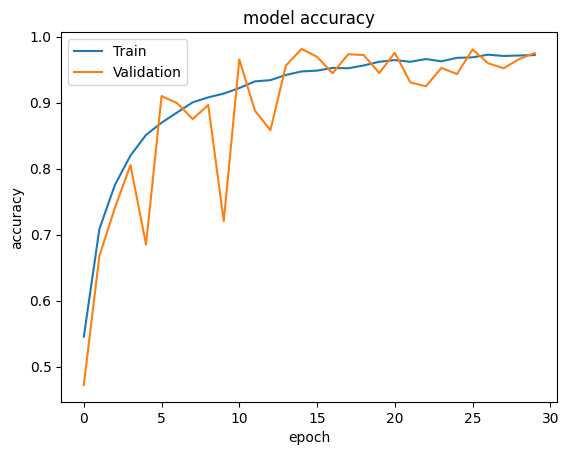

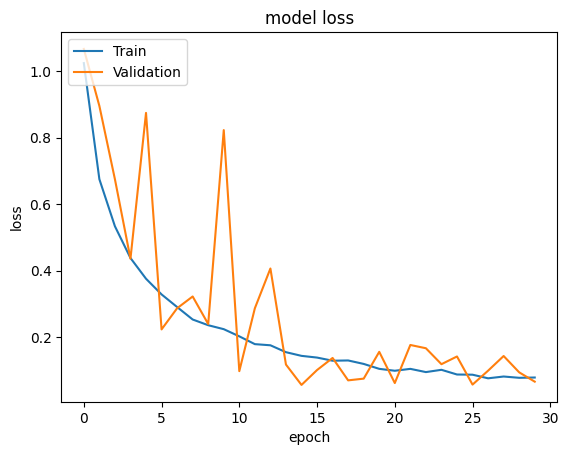

In [21]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()